In [4]:
import numpy as np
import pandas as pd
from keras import models
from keras import layers
from keras.datasets import reuters
from keras.datasets import boston_housing
import matplotlib.pyplot as plt

Loading Dataset

In [5]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


Check Data size

In [7]:
len(train_data)


8982

In [8]:
len(test_data)

2246

In [9]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [10]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

Model Creating

In [12]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
model.compile(optimizer='rmsprop',

loss='categorical_crossentropy',
metrics=['accuracy'])

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Model Fit

In [15]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 77ms/step - loss: 2.8353 - accuracy: 0.4565 - val_loss: 1.9103 - val_accuracy: 0.6110
Epoch 2/20
16/16 [==============================] - 1s 60ms/step - loss: 1.5731 - accuracy: 0.6750 - val_loss: 1.3701 - val_accuracy: 0.7000
Epoch 3/20
16/16 [==============================] - 1s 69ms/step - loss: 1.1775 - accuracy: 0.7468 - val_loss: 1.1630 - val_accuracy: 0.7410
Epoch 4/20
16/16 [==============================] - 1s 69ms/step - loss: 0.9509 - accuracy: 0.7907 - val_loss: 1.0769 - val_accuracy: 0.7590
Epoch 5/20
16/16 [==============================] - 1s 65ms/step - loss: 0.7819 - accuracy: 0.8315 - val_loss: 0.9750 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 1s 51ms/step - loss: 0.6489 - accuracy: 0.8634 - val_loss: 0.9248 - val_accuracy: 0.7990
Epoch 7/20
16/16 [==============================] - 1s 53ms/step - loss: 0.5397 - accuracy: 0.8860 - val_loss: 0.8976 - val_accuracy: 0.8040
Epoch 8/20
16

Result Ploting

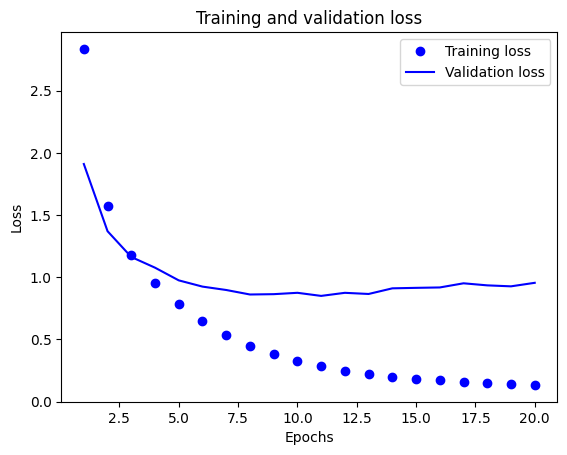

In [16]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()